In [1]:
import pandas as pandas
import matplotlib.pyplot as plot
import numpy as numpy
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import re
import string
import cv2
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Flatten
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, MaxPool2D, SimpleRNN, Flatten, BatchNormalization, Conv2D
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#task 3
text_data = pandas.read_csv("/home/anatoliy/Downloads/data.csv", names=['review', 'rating'], header=0, encoding='utf-8')
text_data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [3]:
length = list(map(len, text_data.review.values))
print('min_length:',numpy.min(length))
print('max_length:',numpy.max(length))
print('median_size:',numpy.median(length))
print('mean_size:',numpy.mean(length))
text_data.rating.value_counts()

min_length: 11
max_length: 509
median_size: 52.0
mean_size: 97.08550521251003


5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [6]:
dictionary_length = 1000
input_length = 50
tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(text_data.review.values)
post_seq = tokenizer.texts_to_sequences(text_data.review.values)
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)
X_first = post_seq_padded
X_first = numpy.array(X_first)
Y_first = text_data['rating'].values
Y_first = numpy.array(Y_first)
X, Y = shuffle(X_first, Y_first, random_state=23)
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=23)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=23)
model = Sequential()
model.add(Embedding(dictionary_length, 2, input_length=input_length))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 2)             2000      
                                                                 
 dense (Dense)               (None, 50, 32)            96        
                                                                 
 dense_1 (Dense)             (None, 50, 32)            1056      
                                                                 
 bidirectional (Bidirectiona  (None, 50, 32)           1568      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 32)           1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)              

In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x=X_train, y=Y_train, batch_size=256, verbose=1, epochs=5, validation_data=(X_validation, Y_validation))

Epoch 1/5
22/22 [==============================] - 12s 155ms/step - loss: -28.4321 - accuracy: 0.0727 - val_loss: -30.9940 - val_accuracy: 0.0655
Epoch 2/5
22/22 [==============================] - 2s 101ms/step - loss: -31.8699 - accuracy: 0.0727 - val_loss: -33.5236 - val_accuracy: 0.0655
Epoch 3/5
22/22 [==============================] - 2s 81ms/step - loss: -34.3415 - accuracy: 0.0727 - val_loss: -35.9831 - val_accuracy: 0.0655
Epoch 4/5
22/22 [==============================] - 2s 102ms/step - loss: -36.7562 - accuracy: 0.0727 - val_loss: -38.4036 - val_accuracy: 0.0655
Epoch 5/5
22/22 [==============================] - 2s 94ms/step - loss: -39.1446 - accuracy: 0.0727 - val_loss: -40.8049 - val_accuracy: 0.0655


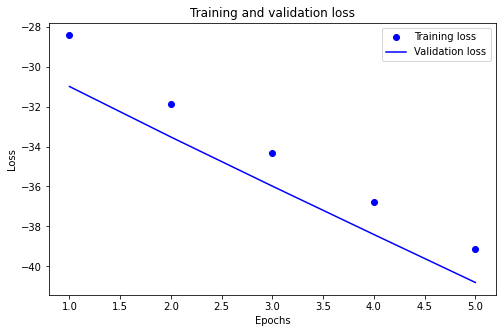

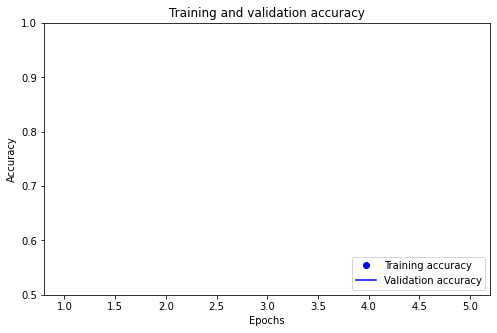

In [15]:
history_dictionary = history.history
accuracy = history_dictionary['accuracy']
validation_accuracy = history_dictionary['val_accuracy']
loss = history_dictionary['loss']
validation_loss = history_dictionary['val_loss']
epochs = range(1, len(acc) + 1)
plot.figure(figsize=(8,5))
plot.plot(epochs, loss, 'bo', label='Training loss')
plot.plot(epochs, validation_loss, 'b', label='Validation loss')
plot.title('Training and validation loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()
plot.show()

plot.figure(figsize=(8,5))
plot.plot(epochs, accuracy, 'bo', label='Training accuracy')
plot.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plot.title('Training and validation accuracy')
plot.xlabel('Epochs')
plot.ylabel('Accuracy')
plot.legend(loc='lower right')
plot.ylim((0.5,1))
plot.show()